<a href="https://colab.research.google.com/github/mrozik1141/Trainings/blob/main/Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [ ]:
df=df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 372.0+ bytes


In [ ]:
for col in ['size', 'color', 'gender', 'bought']:
    df[col]=df[col].astype('category')
df['weight']=df['weight'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 744.0 bytes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df['bought'])


array([1, 0, 1, 0, 1])

In [ ]:
le.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
df['bought']=encoder.fit_transform(df[['size']])

In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
encoder.fit_transform(df[['size']])

<5x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [ ]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 420.0+ bytes


In [ ]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
imputer.statistics_

array([415.])

In [ ]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [ ]:
df['weight']  = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=99.0)
imputer.fit_transform(df[['price']])
df['price']=imputer.fit_transform(df[['price']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,99.0,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='L')
imputer.fit_transform(df[['size']])
df['size'] = imputer.fit_transform(df[['size']])
df


array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

In [2]:
#Metoda gradientu prostego


import plotly.express as px
np.random.seed(42)


In [21]:
X1=np.array([1,2,3,4,5,6])
Y=np.array([3000,3250,3500,3750,4000, 4250])
m=len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [22]:
X1 = X1.reshape(m,1)
Y = Y.reshape(-1,1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [23]:
print(Y)
print(Y.shape)

[[3000]
 [3250]
 [3500]
 [3750]
 [4000]
 [4250]]
(6, 1)


In [24]:
bias = np.ones((m,1))
print(bias)
print(bias.shape)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [37]:
X=np.append(bias,X1,axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


In [45]:
eta=0.01
weight = np.random.randn(2,1)
print(weight)
print(X.dot(weight))

[[1.57921282]
 [0.76743473]]
[[2.34664754]
 [3.11408227]
 [3.881517  ]
 [4.64895173]
 [5.41638646]
 [6.18382119]]


In [39]:
intercept=[]
coef=[]
for i in range(3000):
    gradient = (2/m) * X.T.dot(X.dot(weight)-Y)
    weight = weight - eta * gradient
    intercept.append(weight[0][0])
    coef.append(weight[1][0])
print(weight)


[[2749.95599732]
 [ 250.01027812]]


In [40]:
df = pd.DataFrame(data={'intercept': intercept, 'coef': coef})
df

,intercept,coef
0,72.286919,268.186609
1,124.568118,450.109920
2,163.069062,573.190142
3,192.184370,656.240965
4,214.903815,712.061633
...,...,...
2995,2749.955349,250.010430
2996,2749.955512,250.010391
2997,2749.955674,250.010354
2998,2749.955836,250.010316


In [41]:
px.line(df, x=df.index, y=['intercept'])

In [42]:
px.line(df, x=df.index, y=['coef'])

In [48]:
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, formatter=dict(float=lambda x: f"{x:.2f}"))
sns.set(font_scale=1.3)

In [49]:
from sklearn.datasets import make_regression
data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30, random_state=42)
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [51]:
data[5:]


array([[0.65],
       [-0.46],
       [0.54],
       [0.61],
       [1.00],
       [0.82],
       [1.54],
       [0.74],
       [-0.22],
       [-0.81],
       [0.09],
       [-1.96],
       [0.51],
       [1.03],
       [-2.62],
       [0.50],
       [0.10],
       [-0.47],
       [0.92],
       [1.56],
       [1.47],
       [-0.60],
       [-0.04],
       [-0.60],
       [-1.20],
       [0.36],
       [0.38],
       [0.26],
       [-0.53],
       [-0.91],
       [0.20],
       [-0.30],
       [0.36],
       [0.82],
       [-0.29],
       [0.36],
       [-0.68],
       [1.52],
       [-0.52],
       [-0.23],
       [-0.39],
       [-0.30],
       [-0.65],
       [0.33],
       [0.21],
       [-0.33],
       [0.01],
       [-0.23],
       [1.48],
       [-0.39],
       [0.34],
       [0.33],
       [-0.19],
       [-0.23],
       [-1.99],
       [0.32],
       [-0.23],
       [-1.11],
       [-0.70],
       [-1.46],
       [0.97],
       [-1.72],
       [-1.91],
       [-0.56],
       

In [52]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

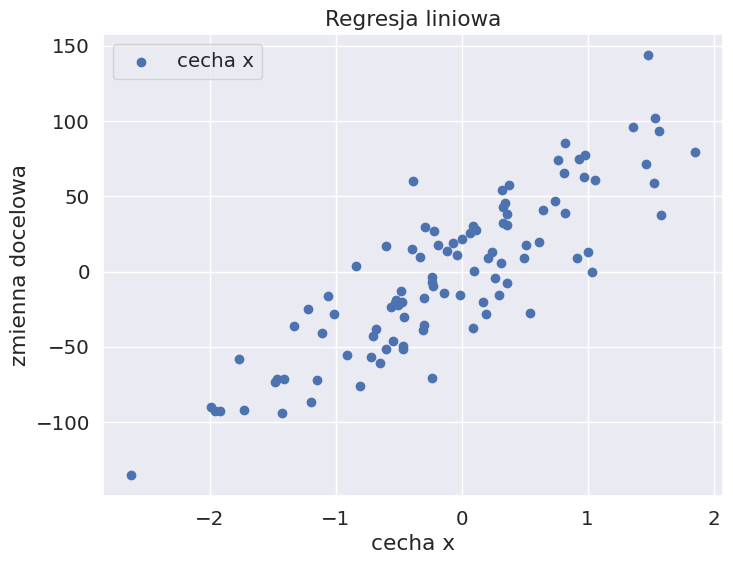

In [53]:
plt.figure(figsize=(8, 6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression()

In [57]:
regressor.score(data,target)

0.7426670084336404

In [58]:
y_pred=regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

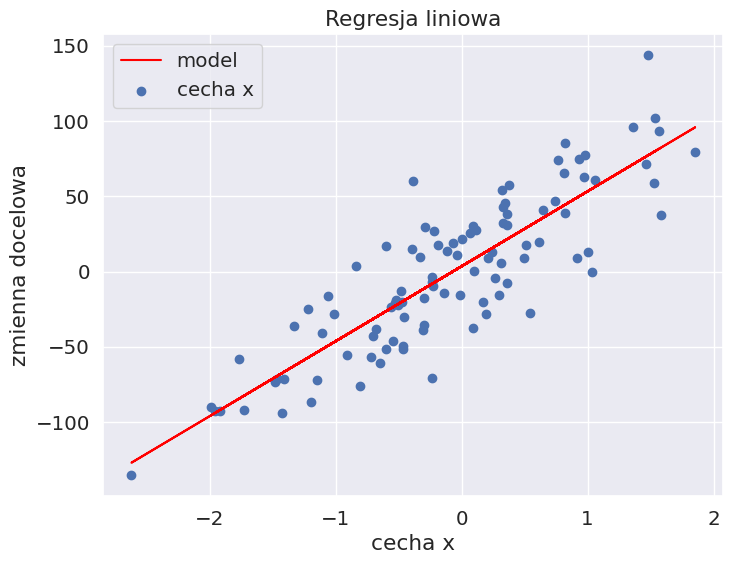

In [60]:
plt.figure(figsize=(8,6))
plt.title("Regresja liniowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.plot(data, y_pred, color='red', label='model')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.show()

In [ ]:
#Regresja wielomianowa